In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt


In [9]:
data=pd.read_csv("amazon.csv",encoding="iso-8859-1",parse_dates=['date'])

In [10]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

**1. Display top 5 rows of the dataset**

In [11]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**2. check last 5 rows of the dataset**

In [12]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


**3.Find the shape of our dataset (number of rows and number of columns)**

In [13]:
data.shape

(6454, 5)

**4.Getting information about our dataset(total number of rows,total number of columns,datatypes of each column and memory requirement)**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


**5.check for duplicate data and drop them**

In [15]:
dup_data=data.duplicated().any()

In [16]:
print("Are there any duplicated values in the data",dup_data)

Are there any duplicated values in the data True


In [17]:
data=data.drop_duplicates()

In [18]:
data.shape

(6422, 5)

**6. check null values in the dataset**

In [19]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

**7.Get overall statistics about the dataframe**

In [22]:
data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


**8.Rename month names to english**

In [23]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [24]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [25]:
data['updated_month']=data['month'].map({'Janeiro':'jan', 'Fevereiro':'feb', 'Março':'march', 'Abril':'april', 'Maio':'may', 'Junho':'june', 'Julho':'july',
       'Agosto':'august', 'Setembro':'sept', 'Outubro':'oct', 'Novembro':'nov', 'Dezembro':'dec'})

In [26]:
data.head()

,year,state,month,number,date,updated_month
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


**9.Total number of  forest fires registered**

In [27]:
data.shape

(6422, 6)

**10. In which month maximum forest fire were reported?**

In [28]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [32]:
data1=data.groupby('updated_month')['number'].sum().reset_index()

In [33]:
data1

,updated_month,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,june,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='updated_month', ylabel='number'>

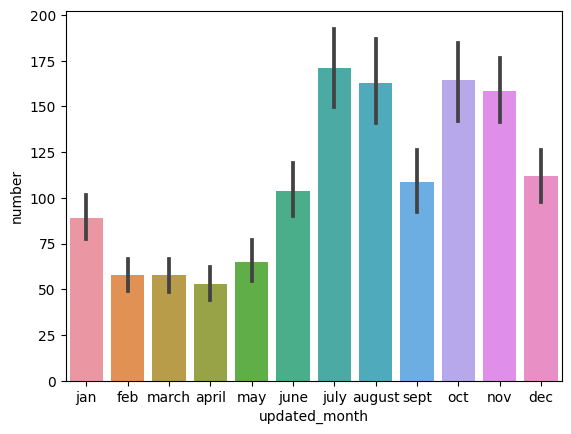

In [35]:
sns.barplot(x="updated_month",y="number",data=data)

**11.In which year maximum number of forest fires were reported?**

In [37]:
data2=data.groupby('year')['number'].sum().reset_index()

In [38]:
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

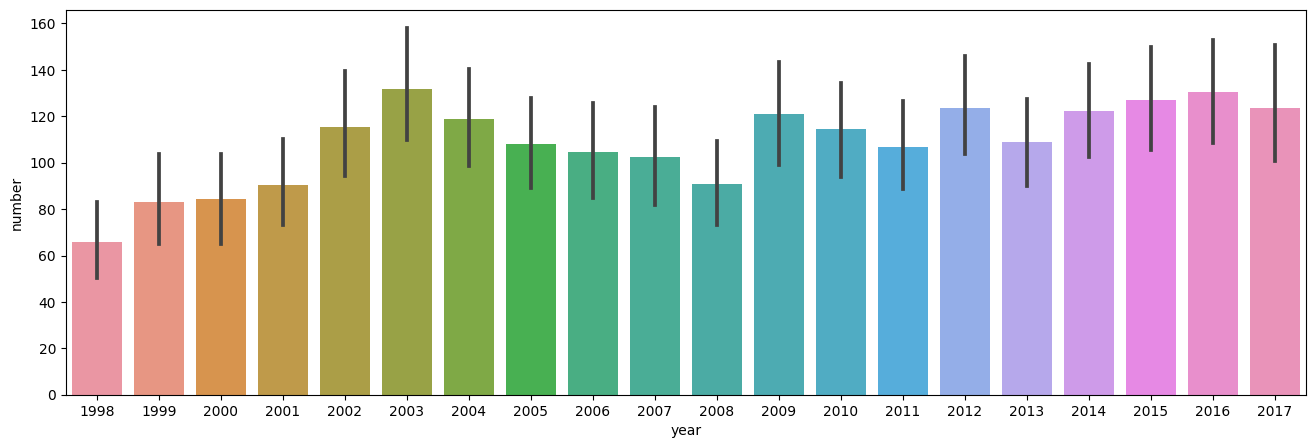

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data)

**12.In which state maximum number of forest fires were reported?**

In [42]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [43]:
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


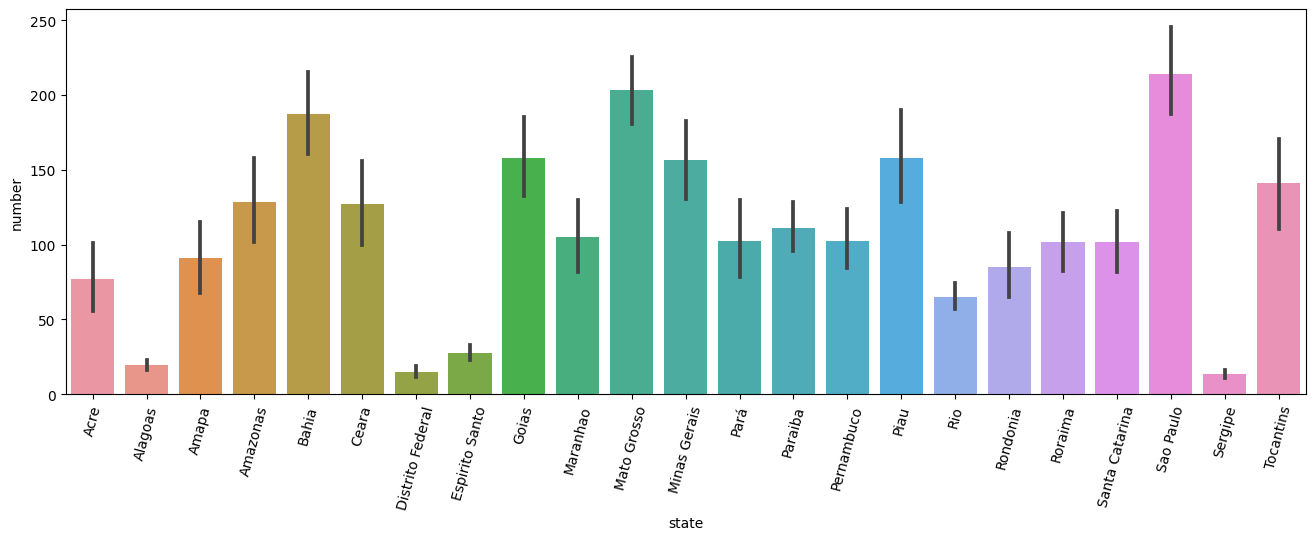

In [51]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data)
plt.xticks(rotation=75)
plt.show()

**13.find total number of fires were reported in amazonas**

In [52]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [56]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

**14. Display the number of forest fires were reported (year-wise)**

In [57]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [61]:
data4=data[data['state']=="Amazonas"]
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

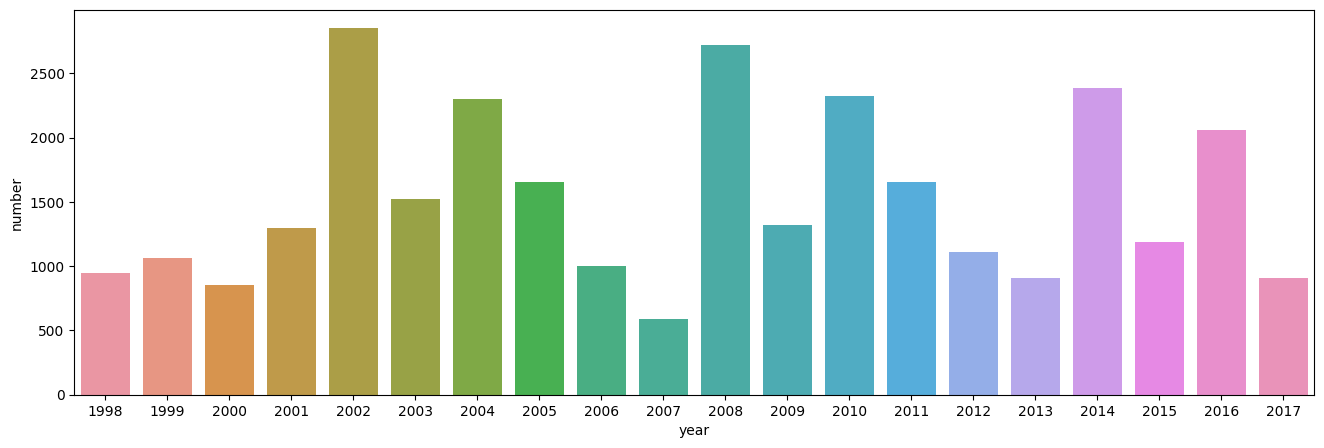

In [63]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data5)

**15.Display number of fires were reported in amazonas (day-wise)**

In [65]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [66]:
data6=data[data['state']=="Amazonas"]


In [67]:
data6

,year,state,month,number,date,updated_month
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [74]:
days= data6.groupby(data6['date'].dt.dayofweek).sum().number
import calendar

days.index = [calendar.day_name[x] for x in range(0, 7)]
days=days.reset_index()
days



<ipython-input-74-16bb38f18483>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  days= data6.groupby(data6['date'].dt.dayofweek).sum().number


,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

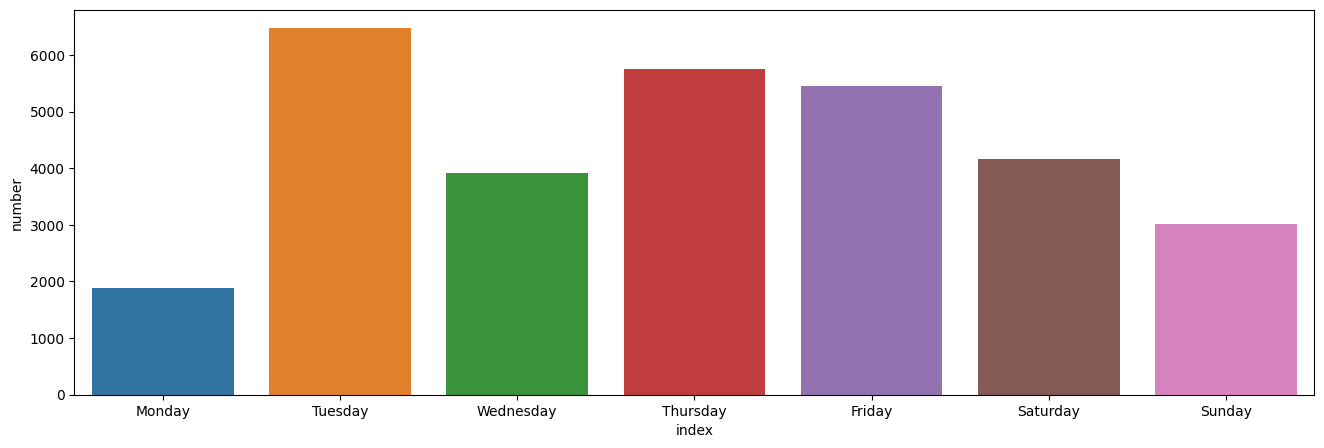

In [76]:
plt.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=days)

**16.Find total number of fires were reported in 2015 and visualize data based on each 'month'**

In [77]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [83]:
fire=data[data['year']==2015].groupby('updated_month')['number'].sum().reset_index()
fire

,updated_month,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='updated_month', ylabel='number'>

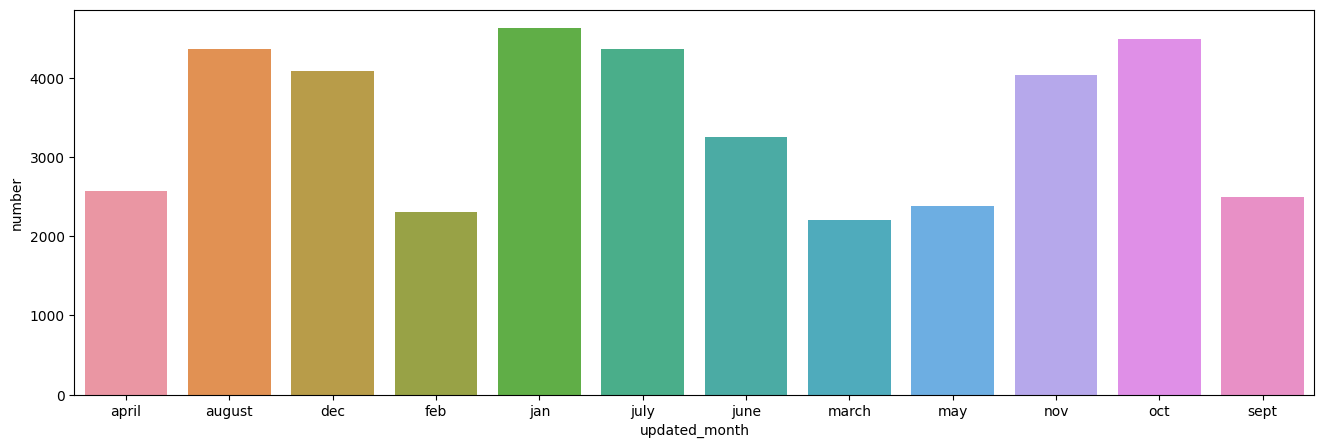

In [85]:
plt.figure(figsize=(16,5))
sns.barplot(x='updated_month',y='number',data=fire)

**17.Find the average number of fires were reported from highest to lowest(state-wise)**

In [86]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [91]:
data8=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [92]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


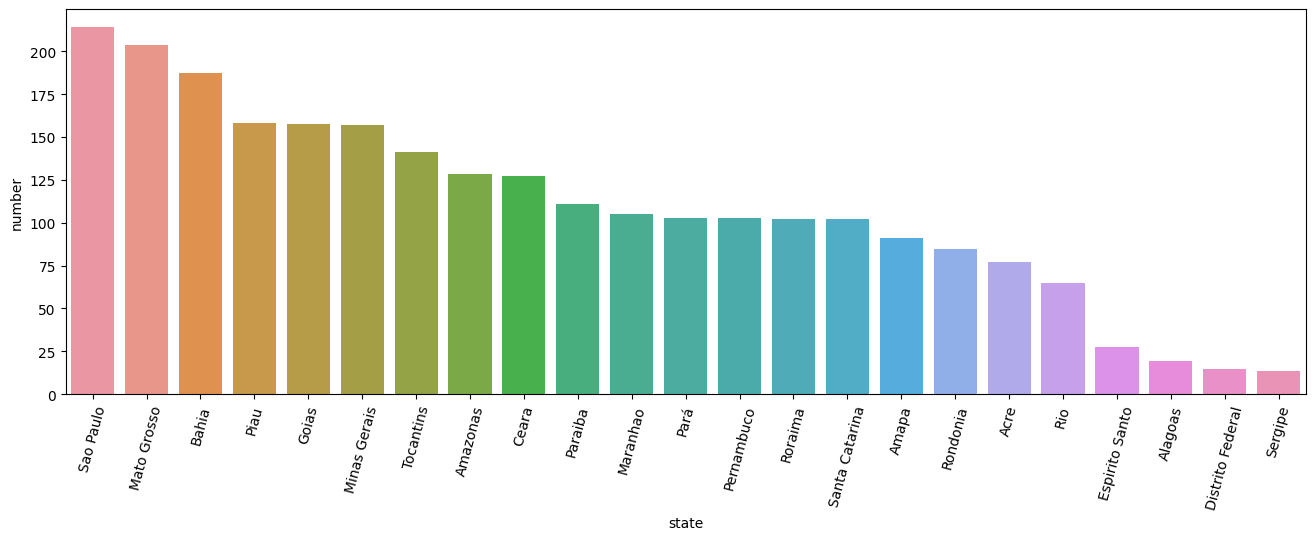

In [94]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

**18.Find the state names where the fires were reported in'dec'month**

In [95]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'updated_month'], dtype='object')

In [99]:
data[data['updated_month']=="dec"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)